In [11]:
import pandas as pd
import numpy as np
from numpy import array
df = pd.read_csv('/home/ubuntu/workspace/BBNI.JK.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-15,8275.0,8300.0,8125.0,8275.0,7932.867676,25268600
1,2022-06-16,8400.0,8475.0,8250.0,8250.0,7908.901367,35080500
2,2022-06-17,8125.0,8250.0,8100.0,8175.0,7837.001953,42844900
3,2022-06-20,8200.0,8225.0,8050.0,8125.0,7789.069336,27255800
4,2022-06-21,8175.0,8450.0,8175.0,8450.0,8100.632324,27525700
...,...,...,...,...,...,...,...
242,2023-06-08,9150.0,9200.0,9075.0,9200.0,9200.000000,17161200
243,2023-06-09,9200.0,9225.0,9150.0,9225.0,9225.000000,17931900
244,2023-06-12,9250.0,9300.0,9175.0,9300.0,9300.000000,17173600
245,2023-06-13,9300.0,9300.0,9100.0,9125.0,9125.000000,20095000


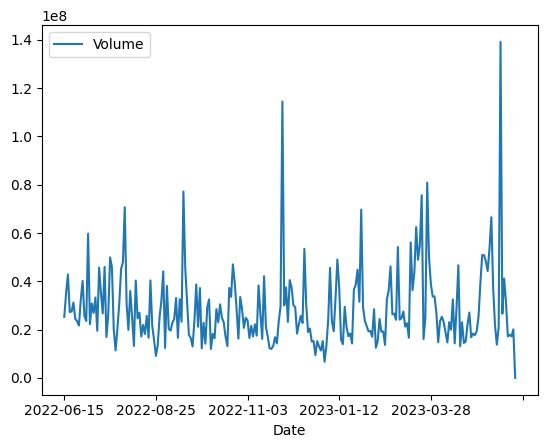

In [2]:
import matplotlib.pyplot as plt
df.plot(x="Date", y="Volume")
plt.show()

In [12]:
df = df['Volume']
df

0      25268600
1      35080500
2      42844900
3      27255800
4      27525700
         ...   
242    17161200
243    17931900
244    17173600
245    20095000
246           0
Name: Volume, Length: 247, dtype: int64

In [13]:
def split_sequence(sequence, n_steps):
    # Inisialisasi list kosong untuk menyimpan input (X) dan output (y)
    X, y = list(), list()
    for i in range(len(sequence)):
        # Menemukan akhir pola ini berdasarkan jumlah langkah (n_steps)
        end_ix = i + n_steps
        # Memeriksa apakah kita sudah melebihi urutan
        if end_ix > len(sequence)-1:
            break
        # Mengumpulkan bagian input dan output dari pola
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)

    # Mengembalikan X dan y dalam bentuk array NumPy
    return array(X), array(y)


In [10]:
n = len(df)
# Menghitung jumlah total data dalam dataset
# dan menyimpannya dalam variabel n


sizeTrain = (round(n*0.8))
# Menghitung jumlah data yang akan digunakan untuk data latih
# dengan mengalikan 0.8 (80%) dengan total jumlah data
# dan membulatkannya ke bilangan terdekat menggunakan fungsi round()
# dan menyimpan hasilnya dalam variabel sizeTrain

data_train = pd.DataFrame(df[:sizeTrain])
train_array = data_train.values  # Mengonversi DataFrame menjadi numpy array
train_scaled = scaler.fit_transform(train_array)  # Melakukan normalisasi pada numpy array
# Membuat DataFrame baru untuk data latih
# dengan menggunakan slicing untuk mengambil data dari indeks 0 sampai sizeTrain
# dan menyimpannya dalam variabel data_train

data_test = pd.DataFrame(df[sizeTrain:])
# Membuat DataFrame baru untuk data uji
# dengan menggunakan slicing untuk mengambil data mulai dari indeks sizeTrain hingga akhir
# dan menyimpannya dalam variabel data_test

#dates_test = pd.DataFrame(dates[sizeTrain:])
# Komentar ini memberikan penjelasan bahwa ada variabel dates yang tidak digunakan di sini

data_train
# Menampilkan DataFrame data_train


,Volume
0,25268600
1,35080500
2,42844900
3,27255800
4,27525700
...,...
193,48899800
194,54982300
195,75613600
196,16097600


In [14]:
# Normalisasi data menggunakan MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Mengimport MinMaxScaler dari library sklearn.preprocessing
# dan membuat objek scaler dari kelas tersebu

train_scaled = scaler.fit_transform(data_train)
# Menggunakan scaler.fit_transform untuk melakukan normalisasi data pada data latih (data_train)
# Normalisasi dilakukan agar nilai-nilai data berada dalam rentang [0, 1]
# Menghasilkan array yang berisi data latih yang telah dinormalisasi dan disimpan dalam variabel train_scaled

test_scaled = scaler.transform(data_test)
# Menggunakan scaler.transform untuk menerapkan normalisasi yang sama pada data uji (data_test)
# Menggunakan transform() karena kita ingin menggunakan parameter yang telah dihitung
# pada proses normalisasi data latih (data_train)
# Menghasilkan array yang berisi data uji yang telah dinormalisasi dan disimpan dalam variabel test_scaled

# reshaped_data = data.reshape(-1, 1)
# Komentar ini memberikan penjelasan bahwa ada variabel reshaped_data yang tidak digunakan di sini

train = pd.DataFrame(train_scaled, columns = ['df'])
# Membuat DataFrame baru untuk data latih yang telah dinormalisasi (train_scaled)
# dengan kolom bernama 'data'

train = train['df']
# Mengambil kolom 'data' dari DataFrame train dan menyimpannya kembali dalam variabel train

test = pd.DataFrame(test_scaled, columns = ['df'])
# Membuat DataFrame baru untuk data uji yang telah dinormalisasi (test_scaled)
# dengan kolom bernama 'data'

test = test['df']
# Mengambil kolom 'data' dari DataFrame test dan menyimpannya kembali dalam variabel test

test
# Menampilkan DataFrame test


0     0.688296
1     0.400708
2     0.298629
3     0.250660
4     0.251306
5     0.188822
6     0.074858
7     0.155655
8     0.173192
9     0.152345
10    0.112727
11    0.074102
12    0.151825
13    0.123164
14    0.239594
15    0.070297
16    0.205427
17    0.370662
18    0.059147
19    0.151991
20    0.072015
21    0.077911
22    0.144193
23    0.189120
24    0.093796
25    0.108324
26    0.102081
27    0.117436
28    0.172263
29    0.300717
30    0.409615
31    0.409847
32    0.385598
33    0.348616
34    0.435951
35    0.555444
36    0.281973
37    0.139946
38    0.065439
39    0.131387
40    1.229209
41    0.184599
42    0.319510
43    0.227576
44    0.097153
45    0.104310
46    0.097269
47    0.124398
48   -0.062211
Name: df, dtype: float64

In [7]:
X, Y = split_sequence(train, 2)
# Memanggil fungsi split_sequence dengan parameter train dan jumlah langkah (steps) sebanyak 2
# Menghasilkan dua array, X yang berisi urutan langkah sebelumnya, dan Y yang berisi langkah saat ini

x = pd.DataFrame(X, columns = ['x2','x1'])
# Membuat DataFrame baru untuk X dengan kolom 'x2' dan 'x1'
# 'x2' berisi urutan langkah sebelumnya, dan 'x1' berisi langkah saat ini

y = pd.DataFrame(Y, columns = ['Prediksi'])
# Membuat DataFrame baru untuk Y dengan kolom 'tPrediksi'
# 'tPrediksi' berisi langkah yang akan diprediksi

dataset_train = pd.concat([x, y], axis=1)
# Menggabungkan DataFrame x dan y secara horizontal (axis=1)
# Menyatukan kolom-kolom 'x2', 'x1', dan 'tPrediksi' menjadi satu DataFrame

dataset_train
# Menampilkan DataFrame dataset_train


,x2,x1,Prediksi
0,0.172441,0.263558,0.335660
1,0.263558,0.335660,0.190895
2,0.335660,0.190895,0.193402
3,0.190895,0.193402,0.227665
4,0.193402,0.227665,0.164699
...,...,...,...
191,0.343532,0.517577,0.391888
192,0.517577,0.391888,0.448372
193,0.391888,0.448372,0.639961
194,0.448372,0.639961,0.087277


In [15]:
X_train = dataset_train.iloc[:, :2].values
# Mengambil nilai-nilai (values) dari kolom pertama dan kedua pada dataset_train
# Menyimpannya dalam variabel X_train

Y_train = dataset_train.iloc[:, -1].values
# Mengambil nilai-nilai (values) dari kolom terakhir pada dataset_train
# Menyimpannya dalam variabel Y_train

X_train
# Menampilkan nilai-nilai dalam variabel X_train


array([[0.17244136, 0.26355779],
       [0.26355779, 0.33566048],
       [0.33566048, 0.19089514],
       [0.19089514, 0.19340151],
       [0.19340151, 0.22766524],
       [0.22766524, 0.16469936],
       [0.16469936, 0.15576221],
       [0.15576221, 0.13915734],
       [0.13915734, 0.23734994],
       [0.23734994, 0.31042399],
       [0.31042399, 0.1754882 ],
       [0.1754882 , 0.15656455],
       [0.15656455, 0.49234854],
       [0.49234854, 0.14429825],
       [0.14429825, 0.22426274],
       [0.22426274, 0.18755763],
       [0.18755763, 0.24702165],
       [0.24702165, 0.11879616],
       [0.11879616, 0.3615721 ],
       [0.3615721 , 0.26431277],
       [0.26431277, 0.18604675],
       [0.18604675, 0.36441   ],
       [0.36441   , 0.09512348],
       [0.09512348, 0.18213535],
       [0.18213535, 0.40095538],
       [0.40095538, 0.36321299],
       [0.36321299, 0.12328424],
       [0.12328424, 0.04344697],
       [0.04344697, 0.1269644 ],
       [0.1269644 , 0.22320502],
       [0.

In [16]:
test_x, test_y = split_sequence(test, 2)
# Memanggil fungsi split_sequence dengan parameter test dan jumlah langkah (steps) sebanyak 2
# Menghasilkan dua array, test_x yang berisi urutan langkah sebelumnya, dan test_y yang berisi langkah saat ini

x = pd.DataFrame(test_x, columns = ['xt-2','xt-1'])
# Membuat DataFrame baru untuk test_x dengan kolom 'xt-2' dan 'xt-1'
# 'xt-2' berisi urutan langkah sebelumnya, dan 'xt-1' berisi langkah saat ini

y = pd.DataFrame(test_y, columns = ['xt'])
# Membuat DataFrame baru untuk test_y dengan kolom 'xt'
# 'xt' berisi langkah saat ini

dataset_test = pd.concat([x, y], axis=1)
# Menggabungkan DataFrame x dan y secara horizontal (axis=1)
# Menyatukan kolom-kolom 'xt-2', 'xt-1', dan 'xt' menjadi satu DataFrame

dataset_test
# Menampilkan DataFrame dataset_test


,xt-2,xt-1,xt
0,0.688296,0.400708,0.298629
1,0.400708,0.298629,0.250660
2,0.298629,0.250660,0.251306
3,0.250660,0.251306,0.188822
4,0.251306,0.188822,0.074858
5,0.188822,0.074858,0.155655
6,0.074858,0.155655,0.173192
7,0.155655,0.173192,0.152345
8,0.173192,0.152345,0.112727
9,0.152345,0.112727,0.074102


In [11]:
X_test = dataset_test.iloc[:, :2].values
# Mengambil nilai-nilai (values) dari kolom pertama dan kedua pada dataset_test
# Menyimpannya dalam variabel X_test

Y_test = dataset_test.iloc[:, -1].values
# Mengambil nilai-nilai (values) dari kolom terakhir pada dataset_test
# Menyimpannya dalam variabel Y_test

print(len(X_test))
# Menampilkan panjang (jumlah baris) dari X_test


47


In [17]:
# Melakukan fitting dan prediksi menggunakan model DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, Y_train)
dt_preds = dt_model.predict(test_x)

#Melakukan fitting dan prediksi menggunakan mlp
from sklearn.neural_network import MLPRegressor
mlp_model = MLPRegressor()
mlp_model.fit(X_train, Y_train)
mlp_preds = mlp_model.predict(test_x)

# Melakukan fitting dan prediksi menggunakan model KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=6)
knn_model.fit(X_train, Y_train)
knn_preds = knn_model.predict(test_x)

In [18]:
# Mengembalikan data hasil prediksi ke skala semula
dt_preds = scaler.inverse_transform(dt_preds.reshape(-1, 1)).flatten()
mlp_preds = scaler.inverse_transform(mlp_preds.reshape(-1, 1)).flatten()
knn_preds = scaler.inverse_transform(knn_preds.reshape(-1, 1)).flatten()

In [19]:

# prediksi.to_excel('prediksi_knn.xlsx', index=False)

prediksi_dt = pd.DataFrame({'Prediksi': dt_preds})
# prediksi.to_excel('prediksi_dt.xlsx', index=False)

prediksi_mlp = pd.DataFrame({'Prediksi': mlp_preds})
# prediksi.to_excel('prediksi_MLP.xlsx', index=False)

prediksi_knn = pd.DataFrame({'Prediksi': knn_preds})
# prediksi.to_excel('prediksi_KNN.xlsx', index=False)


aktual = pd.DataFrame({'Aktual': scaler.inverse_transform(test_y.reshape(-1, 1)).flatten()})
# aktual.to_excel('aktual.xlsx', index=False)

In [20]:
print('prediksi knn:',prediksi_knn)

prediksi knn:         Prediksi
0   3.232123e+07
1   2.542870e+07
2   3.951982e+07
3   2.970705e+07
4   2.660895e+07
5   3.222457e+07
6   3.038000e+07
7   2.311163e+07
8   3.708808e+07
9   2.482437e+07
10  2.483288e+07
11  3.038000e+07
12  2.483732e+07
13  3.491373e+07
14  2.167938e+07
15  2.850253e+07
16  3.103260e+07
17  2.163472e+07
18  2.988168e+07
19  2.823635e+07
20  1.869460e+07
21  2.338505e+07
22  3.874125e+07
23  3.028140e+07
24  1.914000e+07
25  1.914000e+07
26  1.666765e+07
27  2.719905e+07
28  2.607133e+07
29  4.464342e+07
30  4.427510e+07
31  4.427510e+07
32  3.221653e+07
33  4.550738e+07
34  4.950225e+07
35  3.215837e+07
36  2.552252e+07
37  2.708363e+07
38  2.446302e+07
39  2.896333e+07
40  2.807857e+07
41  2.839080e+07
42  3.457807e+07
43  2.688672e+07
44  1.914000e+07
45  1.914000e+07
46  1.597155e+07


In [21]:
print('prediksi dt:',prediksi_dt)

prediksi dt:       Prediksi
0   54982300.0
1   19975100.0
2   29214800.0
3   46150200.0
4   33299800.0
5   42089700.0
6   29655400.0
7   22763000.0
8   40480300.0
9   13143600.0
10  15246000.0
11  30461800.0
12  19252100.0
13  23274100.0
14  15174000.0
15  32491500.0
16  45811900.0
17  38073500.0
18  30461800.0
19  29190100.0
20   9444700.0
21  30735100.0
22  17132200.0
23  42089700.0
24  14248000.0
25  14248000.0
26  17027400.0
27  16614800.0
28  23175400.0
29  48899800.0
30  75613600.0
31  75613600.0
32  15746000.0
33  48899800.0
34  75613600.0
35  19882200.0
36  32258300.0
37  38289100.0
38  30735100.0
39  45416000.0
40  26638500.0
41  23175400.0
42  29214800.0
43  16579400.0
44  14248000.0
45  12995700.0
46  15069500.0


In [22]:
print('prediksi mlp:',prediksi_mlp)

prediksi mlp:         Prediksi
0   5.287556e+07
1   4.008894e+07
2   3.555038e+07
3   3.369840e+07
4   3.269734e+07
5   2.748038e+07
6   2.497565e+07
7   2.843805e+07
8   2.887757e+07
9   2.720459e+07
10  2.492063e+07
11  2.490182e+07
12  2.741660e+07
13  2.807416e+07
14  2.903682e+07
15  2.545446e+07
16  3.388562e+07
17  3.282983e+07
18  2.440433e+07
19  2.620776e+07
20  2.352820e+07
21  2.493230e+07
22  2.818810e+07
23  2.797099e+07
24  2.500495e+07
25  2.538861e+07
26  2.549763e+07
27  2.683107e+07
28  3.124265e+07
29  3.816210e+07
30  4.265108e+07
31  4.222192e+07
32  4.053850e+07
33  4.059623e+07
34  4.638524e+07
35  4.542769e+07
36  3.240254e+07
37  2.564808e+07
38  2.435322e+07
39  4.504691e+07
40  6.405231e+07
41  3.210658e+07
42  3.585892e+07
43  2.943284e+07
44  2.503678e+07
45  2.513813e+07
46  2.542438e+07


In [23]:
# Menghitung Mean Absolute Percentage Error (MAPE) untuk setiap model
from sklearn.metrics import mean_absolute_percentage_error
knn_mape = mean_absolute_percentage_error(aktual['Aktual'], knn_preds) * 100
dt_mape = mean_absolute_percentage_error(aktual['Aktual'], dt_preds) * 100
mlp_mape = mean_absolute_percentage_error(aktual['Aktual'], mlp_preds) * 100

In [24]:
# Menampilkan hasil MAPE
print("MAPE KNeighborsRegressor:", knn_mape)
print("MAPE DecisionTreeRegressor:", dt_mape)
print("MAPE Multilayer Perceptron:", mlp_mape)


MAPE KNeighborsRegressor: 1.5304141835857288e+23
MAPE DecisionTreeRegressor: 1.4439786081842488e+23
MAPE Multilayer Perceptron: 2.436196474094608e+23
